In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib as mpl
mpl.style.use('classic')
mpl.rcParams['font.size'] = 8

In [2]:
#df = pd.read_excel("Testing_data.xlsx")
df = pd.read_excel("Rahi_table.xlsx")
df.head()

,Training,y_tr,Testing,LR_train,ANN_train,SVR_rbf_train,SVR_lin_train,LR_test,SVR_lin,SVR_rbf,ANN,Res_LR_train,Res_ANN_train,Res_SVR_rbf_train,Res_SVR_lin_train,Res_LR,Res_SVR_rbf,Res_SVR_lin,Res_ANN
0,35.5,32.0,30.0,35.711570,31.341618,31.652488,31.186936,29.989815,29.878945,29.972853,30.106461,-0.211570,0.658382,0.347512,0.813064,0.010185,0.121055,0.027147,-0.106461
1,38.5,31.5,39.0,37.592837,30.860765,31.079994,30.702613,38.079819,38.356198,38.099997,38.205662,0.907163,0.639235,0.420006,0.797387,0.920181,0.643802,0.900003,0.794338
2,28.5,31.5,29.5,28.750327,32.261845,32.264841,32.126588,29.613562,29.510604,29.523071,29.791529,-0.250327,-0.761845,-0.764841,-0.626588,-0.113562,-0.010604,-0.023071,-0.291529
3,38.5,27.0,31.0,38.079819,28.390450,27.588399,28.086629,31.491249,31.458094,31.806497,31.623528,0.420181,-1.390450,-0.588399,-1.086629,-0.491249,-0.458094,-0.806497,-0.623528
4,31.5,31.5,33.0,31.004267,31.267111,31.339905,31.060758,32.336029,32.339754,32.424473,32.460793,0.495733,0.232889,0.160095,0.439242,0.663971,0.660246,0.575527,0.539207


In [3]:
#df1 = pd.read_excel("ANN_data.xlsx")
#df1.head()

In [4]:
df_original = df.copy()
#df1_original = df1.copy()

In [5]:
"""count1 = []    
for i in range(5,7):
    x = df1[df1.columns[i]][(df1[df1.columns[i]] >= -2) & (df1[df1.columns[i]] <= 1)].count()
    count1.append(x)
    
count1"""

'count1 = []    \nfor i in range(5,7):\n    x = df1[df1.columns[i]][(df1[df1.columns[i]] >= -2) & (df1[df1.columns[i]] <= 1)].count()\n    count1.append(x)\n    \ncount1'

In [6]:
"""count = []    
for i in range(7,15):
    x = df[df.columns[i]][(df[df.columns[i]] >= -2) & (df[df.columns[i]] <= 1)].count()
    count.append(x)
    
count"""

'count = []    \nfor i in range(7,15):\n    x = df[df.columns[i]][(df[df.columns[i]] >= -2) & (df[df.columns[i]] <= 1)].count()\n    count.append(x)\n    \ncount'

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Training           135 non-null    float64
 1   y_tr               108 non-null    float64
 2   Testing            59 non-null     float64
 3   LR_train           135 non-null    float64
 4   ANN_train          108 non-null    float64
 5   SVR_rbf_train      108 non-null    float64
 6   SVR_lin_train      108 non-null    float64
 7   LR_test            59 non-null     float64
 8   SVR_lin            59 non-null     float64
 9   SVR_rbf            59 non-null     float64
 10  ANN                59 non-null     float64
 11  Res_LR_train       135 non-null    float64
 12  Res_ANN_train      108 non-null    float64
 13  Res_SVR_rbf_train  108 non-null    float64
 14  Res_SVR_lin_train  108 non-null    float64
 15  Res_LR             59 non-null     float64
 16  Res_SVR_rbf        59 non-

In [8]:
df1 = df[["Res_LR_train","Res_ANN_train","Res_SVR_rbf_train","Res_SVR_lin_train","Res_LR","Res_SVR_rbf","Res_SVR_lin","Res_ANN"]]

In [9]:
for i in df1.columns:
    print("2.5% of {} is: {:0.4f}".format(i,df1[i].quantile(.025)))
    print("97.5% of {} is: {:0.4f}\n".format(i,df1[i].quantile(.975)))

2.5% of Res_LR_train is: -1.4534
97.5% of Res_LR_train is: 1.4342

2.5% of Res_ANN_train is: -1.7350
97.5% of Res_ANN_train is: 1.2430

2.5% of Res_SVR_rbf_train is: -1.5532
97.5% of Res_SVR_rbf_train is: 1.3195

2.5% of Res_SVR_lin_train is: -1.7390
97.5% of Res_SVR_lin_train is: 1.3250

2.5% of Res_LR is: -0.9676
97.5% of Res_LR is: 2.8243

2.5% of Res_SVR_rbf is: -0.9271
97.5% of Res_SVR_rbf is: 2.7356

2.5% of Res_SVR_lin is: -1.1318
97.5% of Res_SVR_lin is: 2.6267

2.5% of Res_ANN is: -1.0689
97.5% of Res_ANN is: 2.7330



In [10]:
"""fig, ax = plt.subplots()
fig.set_size_inches(3.5,2.5)
plt.hist(df["Res_LR"],weights = np.ones(len(df["Res_LR"])) / len(df["Res_LR"]),color = "grey", bins = 20)
fig.patch.set_facecolor("white")
ax.set(ylabel = "Frequency (%)", xlabel = "Residual Phi (degree)")
#fig.savefig("residual_LR_test.jpg", dpi = 600, transparent=True, bbox_inches="tight")"""

'fig, ax = plt.subplots()\nfig.set_size_inches(3.5,2.5)\nplt.hist(df["Res_LR"],weights = np.ones(len(df["Res_LR"])) / len(df["Res_LR"]),color = "grey", bins = 20)\nfig.patch.set_facecolor("white")\nax.set(ylabel = "Frequency (%)", xlabel = "Residual Phi (degree)")\n#fig.savefig("residual_LR_test.jpg", dpi = 600, transparent=True, bbox_inches="tight")'

[Text(0, 0.5, 'Frequency (%)'), Text(0.5, 0, 'Residual $\\Phi$ (degree)')]

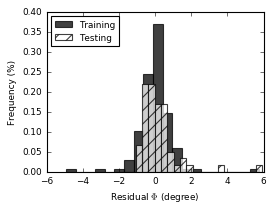

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(3.5,2.5)
plt.hist(df["Res_LR_train"],weights = np.ones(len(df["Res_LR_train"])) / len(df["Res_LR_train"]),\
         color = "k",alpha=0.75, bins = 20, label = "Training")
plt.hist(df["Res_LR"].dropna(),weights = np.ones(len(df["Res_LR"].dropna())) / len(df["Res_LR"].dropna()),\
         color = "white",hatch = "//",alpha = 0.75 ,bins = 20, label = "Testing")
fig.patch.set_facecolor("white")
ax.legend(loc = 2, prop = {"size" : 8})
ax.set(ylabel = "Frequency (%)", xlabel = "Residual $\Phi$ (degree)")
#fig.savefig("residual_LR.jpg", dpi = 600, transparent=True, bbox_inches="tight")

C:\Users\User\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\User\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


[Text(0, 0.5, 'Frequency (%)'), Text(0.5, 0, 'Residual $\\Phi$ (degree)')]

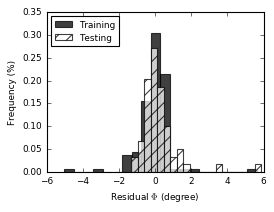

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(3.5,2.5)
plt.hist(df["Res_SVR_rbf_train"],weights = np.ones(len(df["Res_SVR_rbf_train"])) / len(df["Res_SVR_rbf_train"]),\
         color = "k",alpha=0.75, bins = 20, label = "Training")
plt.hist(df["Res_SVR_rbf"].dropna(),weights = np.ones(len(df["Res_SVR_rbf"].dropna())) / len(df["Res_SVR_rbf"].dropna()),\
         color = "white",hatch = "//",alpha = 0.75 ,bins = 20, label = "Testing")
fig.patch.set_facecolor("white")
ax.legend(loc = 2, prop = {"size" : 8})
ax.set(ylabel = "Frequency (%)", xlabel = "Residual $\Phi$ (degree)")
#fig.savefig("residual_SVR_rbf.jpg", dpi = 600, transparent=True, bbox_inches="tight")

[Text(0, 0.5, 'Frequency (%)'), Text(0.5, 0, 'Residual $\\Phi$ (degree)')]

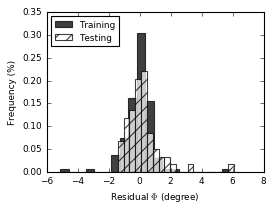

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(3.5,2.5)
plt.hist(df["Res_SVR_lin_train"],weights = np.ones(len(df["Res_SVR_lin_train"])) / len(df["Res_SVR_lin_train"]),\
         color = "k",alpha=0.75, bins = 20, label = "Training")
plt.hist(df["Res_SVR_lin"].dropna(),weights = np.ones(len(df["Res_SVR_lin"].dropna())) / len(df["Res_SVR_lin"].dropna()),\
         color = "white",hatch = "//",alpha = 0.75 ,bins = 20, label = "Testing")
fig.patch.set_facecolor("white")
ax.legend(loc = 2, prop = {"size" : 8})
ax.set(ylabel = "Frequency (%)", xlabel = "Residual $\Phi$ (degree)")
#fig.savefig("residual_SVR_lin.jpg", dpi = 600, transparent=True, bbox_inches="tight")

[Text(0, 0.5, 'Frequency (%)'), Text(0.5, 0, 'Residual $\\Phi$ (degree)')]

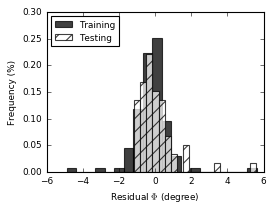

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(3.5,2.5)
plt.hist(df["Res_ANN_train"],weights = np.ones(len(df["Res_ANN_train"])) / len(df["Res_ANN_train"]),\
         color = "k",alpha=0.75, bins = 20, label = "Training")
plt.hist(df["Res_ANN"].dropna(),weights = np.ones(len(df["Res_ANN"].dropna())) / len(df["Res_ANN"].dropna()),\
         color = "white",hatch = "//",alpha = 0.75 ,bins = 20, label = "Testing")
fig.patch.set_facecolor("white")
ax.legend(loc = 2, prop = {"size" : 8})
ax.set(ylabel = "Frequency (%)", xlabel = "Residual $\Phi$ (degree)")
#fig.savefig("residual_ANN.jpg", dpi = 600, transparent=True, bbox_inches="tight")

In [15]:
"""fig, ax = plt.subplots()
fig.set_size_inches(3.6,2.5)
plt.hist(df["Res_ANN_train"],weights = np.ones(len(df["Res_ANN_train"])) / len(df["Res_ANN_train"]),color = "grey", bins = 20)
fig.patch.set_facecolor("white")
ax.set(ylabel = "Frequency (%)", xlabel = "Residual Phi (degree)")
#fig.savefig("residual_ANN_train.jpg", dpi = 600, transparent=True, bbox_inches="tight")"""

'fig, ax = plt.subplots()\nfig.set_size_inches(3.6,2.5)\nplt.hist(df["Res_ANN_train"],weights = np.ones(len(df["Res_ANN_train"])) / len(df["Res_ANN_train"]),color = "grey", bins = 20)\nfig.patch.set_facecolor("white")\nax.set(ylabel = "Frequency (%)", xlabel = "Residual Phi (degree)")\n#fig.savefig("residual_ANN_train.jpg", dpi = 600, transparent=True, bbox_inches="tight")'

In [16]:
"""fig, ax = plt.subplots()
fig.set_size_inches(3.6,2.5)
plt.hist(df["Res_ANN"],weights = np.ones(len(df["Res_ANN"])) / len(df["Res_ANN"]),color = "grey", bins = 20)
fig.patch.set_facecolor("white")
ax.set(ylabel = "Frequency (%)", xlabel = "Residual Phi (degree)")
#fig.savefig("residual_ANN_test.jpg", dpi = 600, transparent=True, bbox_inches="tight")"""

'fig, ax = plt.subplots()\nfig.set_size_inches(3.6,2.5)\nplt.hist(df["Res_ANN"],weights = np.ones(len(df["Res_ANN"])) / len(df["Res_ANN"]),color = "grey", bins = 20)\nfig.patch.set_facecolor("white")\nax.set(ylabel = "Frequency (%)", xlabel = "Residual Phi (degree)")\n#fig.savefig("residual_ANN_test.jpg", dpi = 600, transparent=True, bbox_inches="tight")'

In [17]:
"""fig, ax = plt.subplots()
fig.set_size_inches(3.6,2.5)
plt.hist(df["Res_SVR_rbf_train"],weights = np.ones(len(df["Res_SVR_rbf_train"])) / len(df["Res_SVR_rbf_train"]),color = "grey", bins = 20)
fig.patch.set_facecolor("white")
ax.set(ylabel = "Frequency (%)", xlabel = "Residual Phi (degree)")
#fig.savefig("residual_SVR_rbf_train.jpg", dpi = 600, transparent=True, bbox_inches="tight")"""

'fig, ax = plt.subplots()\nfig.set_size_inches(3.6,2.5)\nplt.hist(df["Res_SVR_rbf_train"],weights = np.ones(len(df["Res_SVR_rbf_train"])) / len(df["Res_SVR_rbf_train"]),color = "grey", bins = 20)\nfig.patch.set_facecolor("white")\nax.set(ylabel = "Frequency (%)", xlabel = "Residual Phi (degree)")\n#fig.savefig("residual_SVR_rbf_train.jpg", dpi = 600, transparent=True, bbox_inches="tight")'

In [18]:
"""fig, ax = plt.subplots()
fig.set_size_inches(3.6,2.5)
plt.hist(df["Res_SVR_lin_train"],weights = np.ones(len(df["Res_SVR_lin_train"])) / len(df["Res_SVR_lin_train"]),color = "grey", bins = 20)
fig.patch.set_facecolor("white")
ax.set(ylabel = "Frequency (%)", xlabel = "Residual Phi (degree)")
#fig.savefig("residual_SVR_lin_train.jpg", dpi = 600, transparent=True, bbox_inches="tight")"""

'fig, ax = plt.subplots()\nfig.set_size_inches(3.6,2.5)\nplt.hist(df["Res_SVR_lin_train"],weights = np.ones(len(df["Res_SVR_lin_train"])) / len(df["Res_SVR_lin_train"]),color = "grey", bins = 20)\nfig.patch.set_facecolor("white")\nax.set(ylabel = "Frequency (%)", xlabel = "Residual Phi (degree)")\n#fig.savefig("residual_SVR_lin_train.jpg", dpi = 600, transparent=True, bbox_inches="tight")'

In [19]:
"""fig, ax = plt.subplots()
fig.set_size_inches(3.6,2.5)
plt.hist(df["Res_SVR_rbf"],weights = np.ones(len(df["Res_SVR_rbf"])) / len(df["Res_SVR_rbf"]),color = "grey", bins = 20)
fig.patch.set_facecolor("white")
ax.set(ylabel = "Frequency (%)", xlabel = "Residual Phi (degree)")
#fig.savefig("residual_SVR_rbf.jpg", dpi = 600, transparent=True, bbox_inches="tight")"""

'fig, ax = plt.subplots()\nfig.set_size_inches(3.6,2.5)\nplt.hist(df["Res_SVR_rbf"],weights = np.ones(len(df["Res_SVR_rbf"])) / len(df["Res_SVR_rbf"]),color = "grey", bins = 20)\nfig.patch.set_facecolor("white")\nax.set(ylabel = "Frequency (%)", xlabel = "Residual Phi (degree)")\n#fig.savefig("residual_SVR_rbf.jpg", dpi = 600, transparent=True, bbox_inches="tight")'

In [20]:
"""fig, ax = plt.subplots()
fig.set_size_inches(3.6,2.5)
plt.hist(df["Res_SVR_lin"],weights = np.ones(len(df["Res_SVR_lin"])) / len(df["Res_SVR_lin"]),color = "grey", bins = 20)
fig.patch.set_facecolor("white")
ax.set(ylabel = "Frequency (%)", xlabel = "Residual Phi (degree)")
#fig.savefig("residual_SVR_lin.jpg", dpi = 600, transparent=True, bbox_inches="tight")"""

'fig, ax = plt.subplots()\nfig.set_size_inches(3.6,2.5)\nplt.hist(df["Res_SVR_lin"],weights = np.ones(len(df["Res_SVR_lin"])) / len(df["Res_SVR_lin"]),color = "grey", bins = 20)\nfig.patch.set_facecolor("white")\nax.set(ylabel = "Frequency (%)", xlabel = "Residual Phi (degree)")\n#fig.savefig("residual_SVR_lin.jpg", dpi = 600, transparent=True, bbox_inches="tight")'

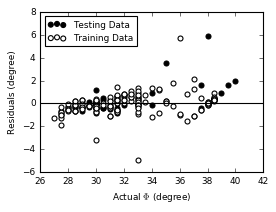

In [21]:
fig, ax = plt.subplots(figsize = (3.6,2.5))
#fig.set_size_inches(3.5,3)

ax.scatter(df["Testing"], df["Res_LR"], c = "k", label = "Testing Data")
ax.scatter(df["Training"], df["Res_LR_train"], c = "w", label = "Training Data")
ax.set(ylabel = "Residuals (degree)", xlabel = "Actual $\Phi$ (degree)")
ax.legend(loc = 2, prop = {"size" : 8})
plt.axhline(y=0, color='k', linestyle='-', linewidth = 1)
fig.patch.set_facecolor("White")
#ax.tick_params(length = 4, width = 1)
#fig.savefig("scatter_LR.jpg", dpi = 600, transparent=True, bbox_inches="tight")

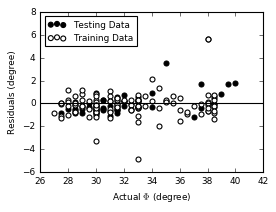

In [22]:
fig, ax = plt.subplots(figsize = (3.6,2.5))
#fig.set_size_inches(3.5,3)

ax.scatter(df["Testing"], df["Res_ANN"], c = "k", label = "Testing Data")
ax.scatter(df["Training"], df["Res_ANN_train"], c = "w", label = "Training Data")
ax.set(ylabel = "Residuals (degree)", xlabel = "Actual $\Phi$ (degree)")
ax.legend(loc = 2, prop = {"size" : 8})
plt.axhline(y=0, color='k', linestyle='-', linewidth = 1)
fig.patch.set_facecolor("White")
#ax.tick_params(length = 4, width = 1)
#fig.savefig("scatter_ANN.jpg", dpi = 600, transparent=True, bbox_inches="tight")

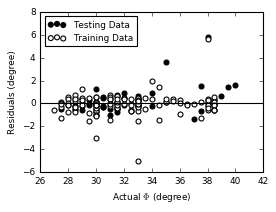

In [23]:
fig, ax = plt.subplots(figsize = (3.6,2.5))
#fig.set_size_inches(3.5,3)

ax.scatter(df["Testing"], df["Res_SVR_rbf"], c = "k", label = "Testing Data")
ax.scatter(df["Training"], df["Res_SVR_rbf_train"], c = "w", label = "Training Data")
ax.set(ylabel = "Residuals (degree)", xlabel = "Actual $\Phi$ (degree)")
ax.legend(loc = 2, prop = {"size" : 8})
plt.axhline(y=0, color='k', linestyle='-', linewidth = 1)
fig.patch.set_facecolor("White")
#ax.tick_params(length = 4, width = 1)
#fig.savefig("scatter_SVR_rbf.jpg", dpi = 600, transparent=True, bbox_inches="tight")

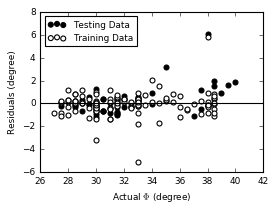

In [24]:
fig, ax = plt.subplots(figsize = (3.6,2.5))
#fig.set_size_inches(3.5,3)

ax.scatter(df["Testing"], df["Res_SVR_lin"], c = "k", label = "Testing Data")
ax.scatter(df["Training"], df["Res_SVR_lin_train"], c = "w", label = "Training Data")
ax.set(ylabel = "Residuals (degree)", xlabel = "Actual $\Phi$ (degree)")
ax.legend(loc = 2, prop = {"size" : 8})
plt.axhline(y=0, color='k', linestyle='-', linewidth = 1)
fig.patch.set_facecolor("White")
#ax.tick_params(length = 4, width = 1)
#fig.savefig("scatter_SVR_lin.jpg", dpi = 600, transparent=True, bbox_inches="tight")

In [25]:
df.columns

Index(['Training', 'y_tr', 'Testing', 'LR_train', 'ANN_train', 'SVR_rbf_train',
       'SVR_lin_train', 'LR_test', 'SVR_lin', 'SVR_rbf', 'ANN', 'Res_LR_train',
       'Res_ANN_train', 'Res_SVR_rbf_train', 'Res_SVR_lin_train', 'Res_LR',
       'Res_SVR_rbf', 'Res_SVR_lin', 'Res_ANN'],
      dtype='object')

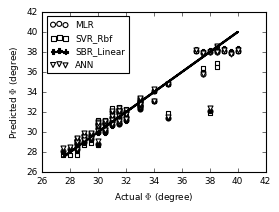

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches(3.6, 2.5)

ax.scatter(df["Testing"], df["LR_test"], c = "w", label = "MLR")
ax.scatter(df["Testing"], df["SVR_rbf"], c = "w", label = "SVR_Rbf", marker = "s")
ax.scatter(df["Testing"], df["SVR_lin"], c = "k", marker = "P", label = "SBR_Linear")
ax.scatter(df["Testing"], df["ANN"], c = "w", marker = "v", label = "ANN")
plt.plot(df["Testing"], df["Testing"], c = "k", linewidth = 2)
ax.set(ylabel = "Predicted $\Phi$ (degree)", xlabel = "Actual $\Phi$ (degree)")
fig.patch.set_facecolor("White")
ax.legend(loc = 2, prop = {"size" : 8})
#ax.tick_params(length = 4, width = 2)
#fig.savefig("testing_new.jpg", dpi = 600, transparent=True, bbox_inches="tight")

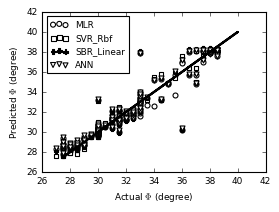

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(3.6, 2.5)

ax.scatter(df["Training"], df["LR_train"], c = "w", label = "MLR")
ax.scatter(df["y_tr"], df["SVR_rbf_train"], c = "w", label = "SVR_Rbf", marker = "s")
ax.scatter(df["y_tr"], df["SVR_lin_train"], c = "k", marker = "P", label = "SBR_Linear")
ax.scatter(df["y_tr"], df["ANN_train"], c = "w", marker = "v", label = "ANN")
plt.plot(df["Testing"], df["Testing"], c = "k", linewidth = 2)
ax.set(ylabel = "Predicted $\Phi$ (degree)", xlabel = "Actual $\Phi$ (degree)")
fig.patch.set_facecolor("White")
ax.legend(loc = 2, prop = {"size" : 8})
#ax.tick_params(length = 4, width = 2)
#fig.savefig("training_new.jpg", dpi = 600, transparent=True, bbox_inches="tight")

In [28]:
"""fig, ax = plt.subplots()
fig.set_size_inches(3.6, 2.5)

ax.scatter(df["Testing"], df["LR_test"], c = "k")
plt.plot(df["Testing"], df["Testing"], c = "k", linewidth = 2)
ax.set(ylabel = "Predicted Phi (degree)", xlabel = "Actual Phi (degree)")
fig.patch.set_facecolor("White")
#ax.tick_params(length = 4, width = 2)
#fig.savefig("LR_test.jpg", dpi = 600, transparent=True, bbox_inches="tight")"""

'fig, ax = plt.subplots()\nfig.set_size_inches(3.6, 2.5)\n\nax.scatter(df["Testing"], df["LR_test"], c = "k")\nplt.plot(df["Testing"], df["Testing"], c = "k", linewidth = 2)\nax.set(ylabel = "Predicted Phi (degree)", xlabel = "Actual Phi (degree)")\nfig.patch.set_facecolor("White")\n#ax.tick_params(length = 4, width = 2)\n#fig.savefig("LR_test.jpg", dpi = 600, transparent=True, bbox_inches="tight")'

In [29]:
"""fig, ax = plt.subplots()
fig.set_size_inches(3.6, 2.5)

ax.scatter(df["Training"], df["LR_train"], c = "k")
plt.plot(df["Training"], df["Training"], c = "k", linewidth = 2)
ax.set(ylabel = "Predicted Phi (degree)", xlabel = "Actual Phi (degree)")
fig.patch.set_facecolor("White")
#ax.tick_params(length = 4, width = 2)
#fig.savefig("LR_train.jpg", dpi = 600, transparent=True, bbox_inches="tight")"""

'fig, ax = plt.subplots()\nfig.set_size_inches(3.6, 2.5)\n\nax.scatter(df["Training"], df["LR_train"], c = "k")\nplt.plot(df["Training"], df["Training"], c = "k", linewidth = 2)\nax.set(ylabel = "Predicted Phi (degree)", xlabel = "Actual Phi (degree)")\nfig.patch.set_facecolor("White")\n#ax.tick_params(length = 4, width = 2)\n#fig.savefig("LR_train.jpg", dpi = 600, transparent=True, bbox_inches="tight")'

In [30]:
"""fig, ax = plt.subplots()
fig.set_size_inches(3.6, 2.5)

ax.scatter(df["Testing"], df["ANN"], c = "k")
plt.plot(df["Testing"], df["Testing"], c = "k", linewidth = 2)
ax.set(ylabel = "Predicted Phi (degree)", xlabel = "Actual Phi (degree)")
fig.patch.set_facecolor("White")
#ax.tick_params(length = 4, width = 2)
#fig.savefig("ANN_test.jpg", dpi = 600, transparent=True, bbox_inches="tight")"""

'fig, ax = plt.subplots()\nfig.set_size_inches(3.6, 2.5)\n\nax.scatter(df["Testing"], df["ANN"], c = "k")\nplt.plot(df["Testing"], df["Testing"], c = "k", linewidth = 2)\nax.set(ylabel = "Predicted Phi (degree)", xlabel = "Actual Phi (degree)")\nfig.patch.set_facecolor("White")\n#ax.tick_params(length = 4, width = 2)\n#fig.savefig("ANN_test.jpg", dpi = 600, transparent=True, bbox_inches="tight")'

In [31]:
"""fig, ax = plt.subplots()
fig.set_size_inches(3.6, 2.5)

ax.scatter(df["y_tr"], df["ANN_train"], c = "k")
plt.plot(df["y_tr"], df["y_tr"], c = "k", linewidth = 2)
ax.set(ylabel = "Predicted Phi (degree)", xlabel = "Actual Phi (degree)")
fig.patch.set_facecolor("White")
#ax.tick_params(length = 4, width = 2)
#fig.savefig("ANN_train.jpg", dpi = 600, transparent=True, bbox_inches="tight")"""

'fig, ax = plt.subplots()\nfig.set_size_inches(3.6, 2.5)\n\nax.scatter(df["y_tr"], df["ANN_train"], c = "k")\nplt.plot(df["y_tr"], df["y_tr"], c = "k", linewidth = 2)\nax.set(ylabel = "Predicted Phi (degree)", xlabel = "Actual Phi (degree)")\nfig.patch.set_facecolor("White")\n#ax.tick_params(length = 4, width = 2)\n#fig.savefig("ANN_train.jpg", dpi = 600, transparent=True, bbox_inches="tight")'

In [32]:
"""fig, ax = plt.subplots()
fig.set_size_inches(3.6, 2.5)

ax.scatter(df["y_tr"], df["SVR_rbf_train"], c = "k")
plt.plot(df["y_tr"], df["y_tr"], c = "k", linewidth = 2)
ax.set(ylabel = "Predicted Phi (degree)", xlabel = "Actual Phi (degree)")
fig.patch.set_facecolor("White")
#ax.tick_params(length = 4, width = 2)
#fig.savefig("SVR_rbf_train.jpg", dpi = 600, transparent=True, bbox_inches="tight")"""

'fig, ax = plt.subplots()\nfig.set_size_inches(3.6, 2.5)\n\nax.scatter(df["y_tr"], df["SVR_rbf_train"], c = "k")\nplt.plot(df["y_tr"], df["y_tr"], c = "k", linewidth = 2)\nax.set(ylabel = "Predicted Phi (degree)", xlabel = "Actual Phi (degree)")\nfig.patch.set_facecolor("White")\n#ax.tick_params(length = 4, width = 2)\n#fig.savefig("SVR_rbf_train.jpg", dpi = 600, transparent=True, bbox_inches="tight")'

In [33]:
"""fig, ax = plt.subplots()
fig.set_size_inches(3.6, 2.5)

ax.scatter(df["y_tr"], df["SVR_lin_train"], c = "k")
plt.plot(df["y_tr"], df["y_tr"], c = "k", linewidth = 2)
ax.set(ylabel = "Predicted Phi (degree)", xlabel = "Actual Phi (degree)")
fig.patch.set_facecolor("White")
#ax.tick_params(length = 4, width = 2)
#fig.savefig("SVR_lin_train.jpg", dpi = 600, transparent=True, bbox_inches="tight")"""

'fig, ax = plt.subplots()\nfig.set_size_inches(3.6, 2.5)\n\nax.scatter(df["y_tr"], df["SVR_lin_train"], c = "k")\nplt.plot(df["y_tr"], df["y_tr"], c = "k", linewidth = 2)\nax.set(ylabel = "Predicted Phi (degree)", xlabel = "Actual Phi (degree)")\nfig.patch.set_facecolor("White")\n#ax.tick_params(length = 4, width = 2)\n#fig.savefig("SVR_lin_train.jpg", dpi = 600, transparent=True, bbox_inches="tight")'

In [34]:
"""fig, ax = plt.subplots()
fig.set_size_inches(3.6, 2.5)

ax.scatter(df["Testing"], df["SVR_rbf"], c = "k")
plt.plot(df["Testing"], df["Testing"], c = "k", linewidth = 2)
ax.set(ylabel = "Predicted Phi (degree)", xlabel = "Actual Phi (degree)")
fig.patch.set_facecolor("White")
#ax.tick_params(length = 4, width = 2)
#fig.savefig("SVR_rbf_test.jpg", dpi = 600, transparent=True, bbox_inches="tight")"""

'fig, ax = plt.subplots()\nfig.set_size_inches(3.6, 2.5)\n\nax.scatter(df["Testing"], df["SVR_rbf"], c = "k")\nplt.plot(df["Testing"], df["Testing"], c = "k", linewidth = 2)\nax.set(ylabel = "Predicted Phi (degree)", xlabel = "Actual Phi (degree)")\nfig.patch.set_facecolor("White")\n#ax.tick_params(length = 4, width = 2)\n#fig.savefig("SVR_rbf_test.jpg", dpi = 600, transparent=True, bbox_inches="tight")'

In [35]:
"""fig, ax = plt.subplots()
fig.set_size_inches(3.6, 2.5)

ax.scatter(df["Testing"], df["SVR_lin"], c = "k")
plt.plot(df["Testing"], df["Testing"], c = "k", linewidth = 2)
ax.set(ylabel = "Predicted Phi (degree)", xlabel = "Actual Phi (degree)")
fig.patch.set_facecolor("White")
#ax.tick_params(length = 4, width = 2)
#fig.savefig("SVR_lin_test.jpg", dpi = 600, transparent=True, bbox_inches="tight")"""

'fig, ax = plt.subplots()\nfig.set_size_inches(3.6, 2.5)\n\nax.scatter(df["Testing"], df["SVR_lin"], c = "k")\nplt.plot(df["Testing"], df["Testing"], c = "k", linewidth = 2)\nax.set(ylabel = "Predicted Phi (degree)", xlabel = "Actual Phi (degree)")\nfig.patch.set_facecolor("White")\n#ax.tick_params(length = 4, width = 2)\n#fig.savefig("SVR_lin_test.jpg", dpi = 600, transparent=True, bbox_inches="tight")'